In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, validation_curve
from sklearn.preprocessing import LabelBinarizer, label_binarize, StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, roc_curve, classification_report
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import cohen_kappa_score, brier_score_loss
from sklearn.calibration import calibration_curve
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.inspection import permutation_importance, partial_dependence, PartialDependenceDisplay
import logging
from sklearn.calibration import calibration_curve,  CalibrationDisplay
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
import statsmodels.api as sm
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import multivariate_normal
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import chi2_contingency
import optuna 
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
dff = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\wine.csv")
dff.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [3]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
dff.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [5]:
dff.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
dff.duplicated().sum()

0

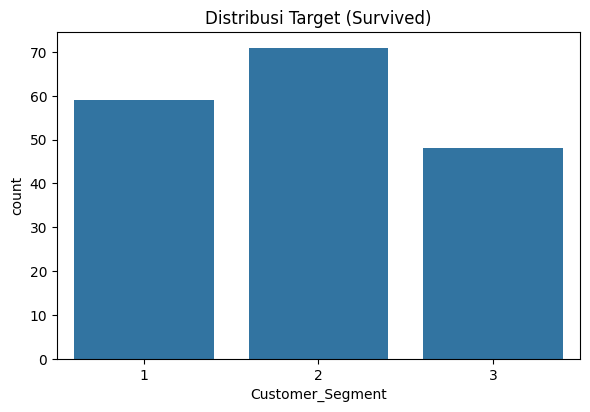

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Customer_Segment', data=dff)
plt.tight_layout()
plt.title('Distribusi Target (Survived)')
plt.show()

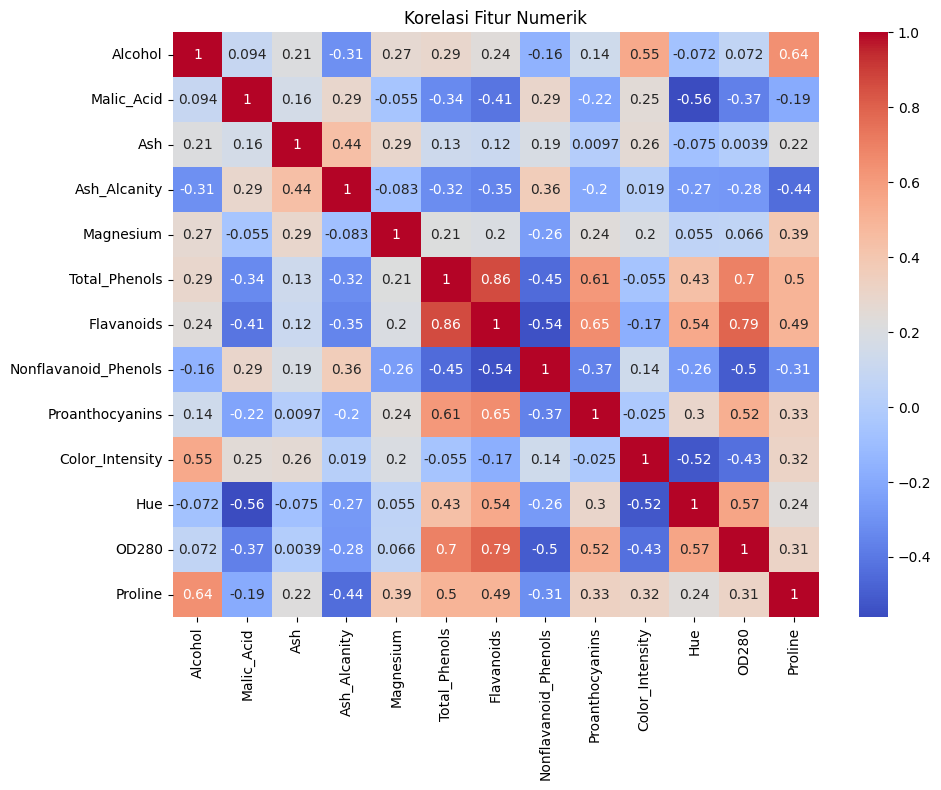

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(dff.drop(columns="Customer_Segment").corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

In [13]:
missing = dff.isnull().sum().sort_values(ascending=False)
missing_percent = (dff.isnull().sum()/dff.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, missing_percent], axis=1, keys=['Total', 'Persen'])
print(missing_data)

                      Total  Persen
Alcohol                   0     0.0
Malic_Acid                0     0.0
Ash                       0     0.0
Ash_Alcanity              0     0.0
Magnesium                 0     0.0
Total_Phenols             0     0.0
Flavanoids                0     0.0
Nonflavanoid_Phenols      0     0.0
Proanthocyanins           0     0.0
Color_Intensity           0     0.0
Hue                       0     0.0
OD280                     0     0.0
Proline                   0     0.0
Customer_Segment          0     0.0


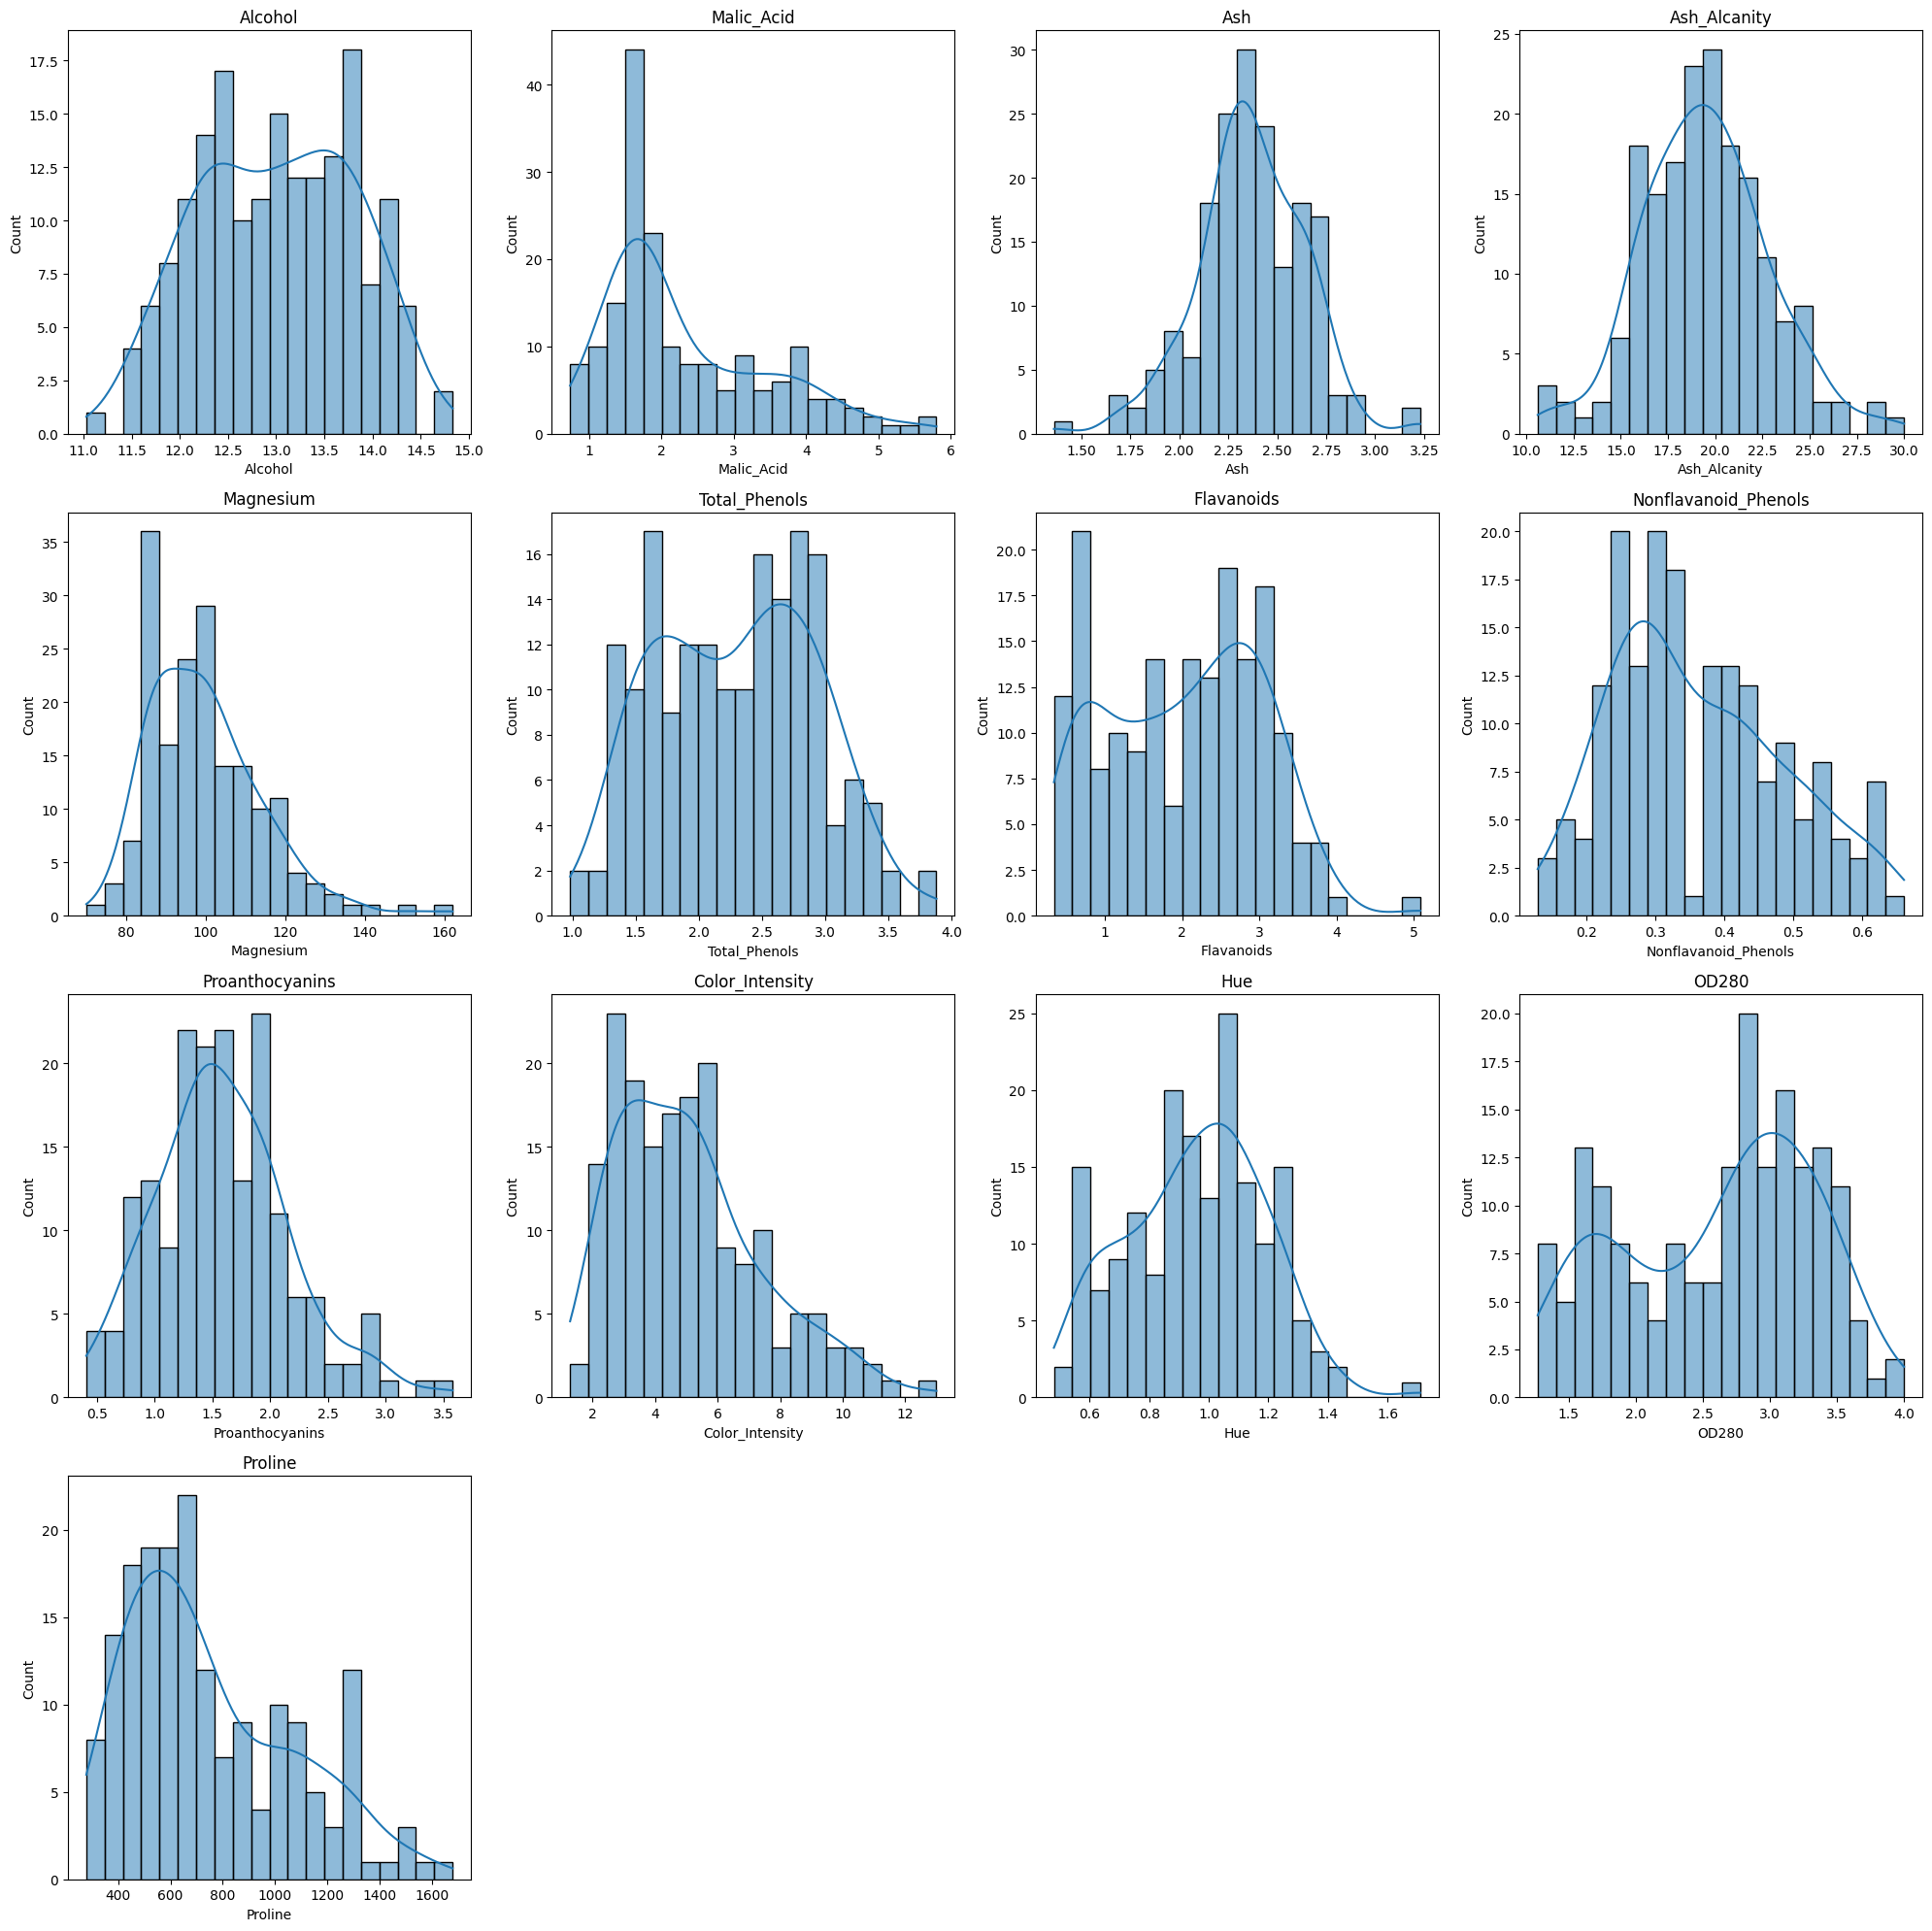

In [17]:
numeric_cols = dff.drop(columns="Customer_Segment", axis=1).columns
n_cols = len(numeric_cols)

rows = 4
cols = 4
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

for i, ax in enumerate(axs.flat):
    if i < n_cols:
        col = numeric_cols[i]
        sns.histplot(dff[col], bins=20, kde=True, ax=ax)
        ax.set_title(f'{col}')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

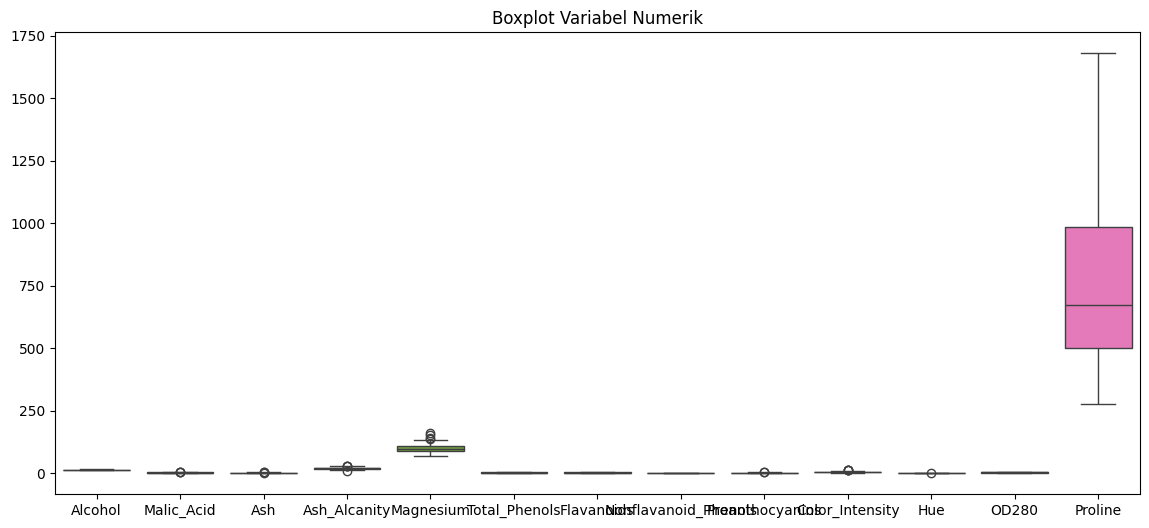

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(data=dff.drop(['Customer_Segment'], axis=1))
plt.title('Boxplot Variabel Numerik')
plt.show()

<Figure size 2000x2000 with 0 Axes>

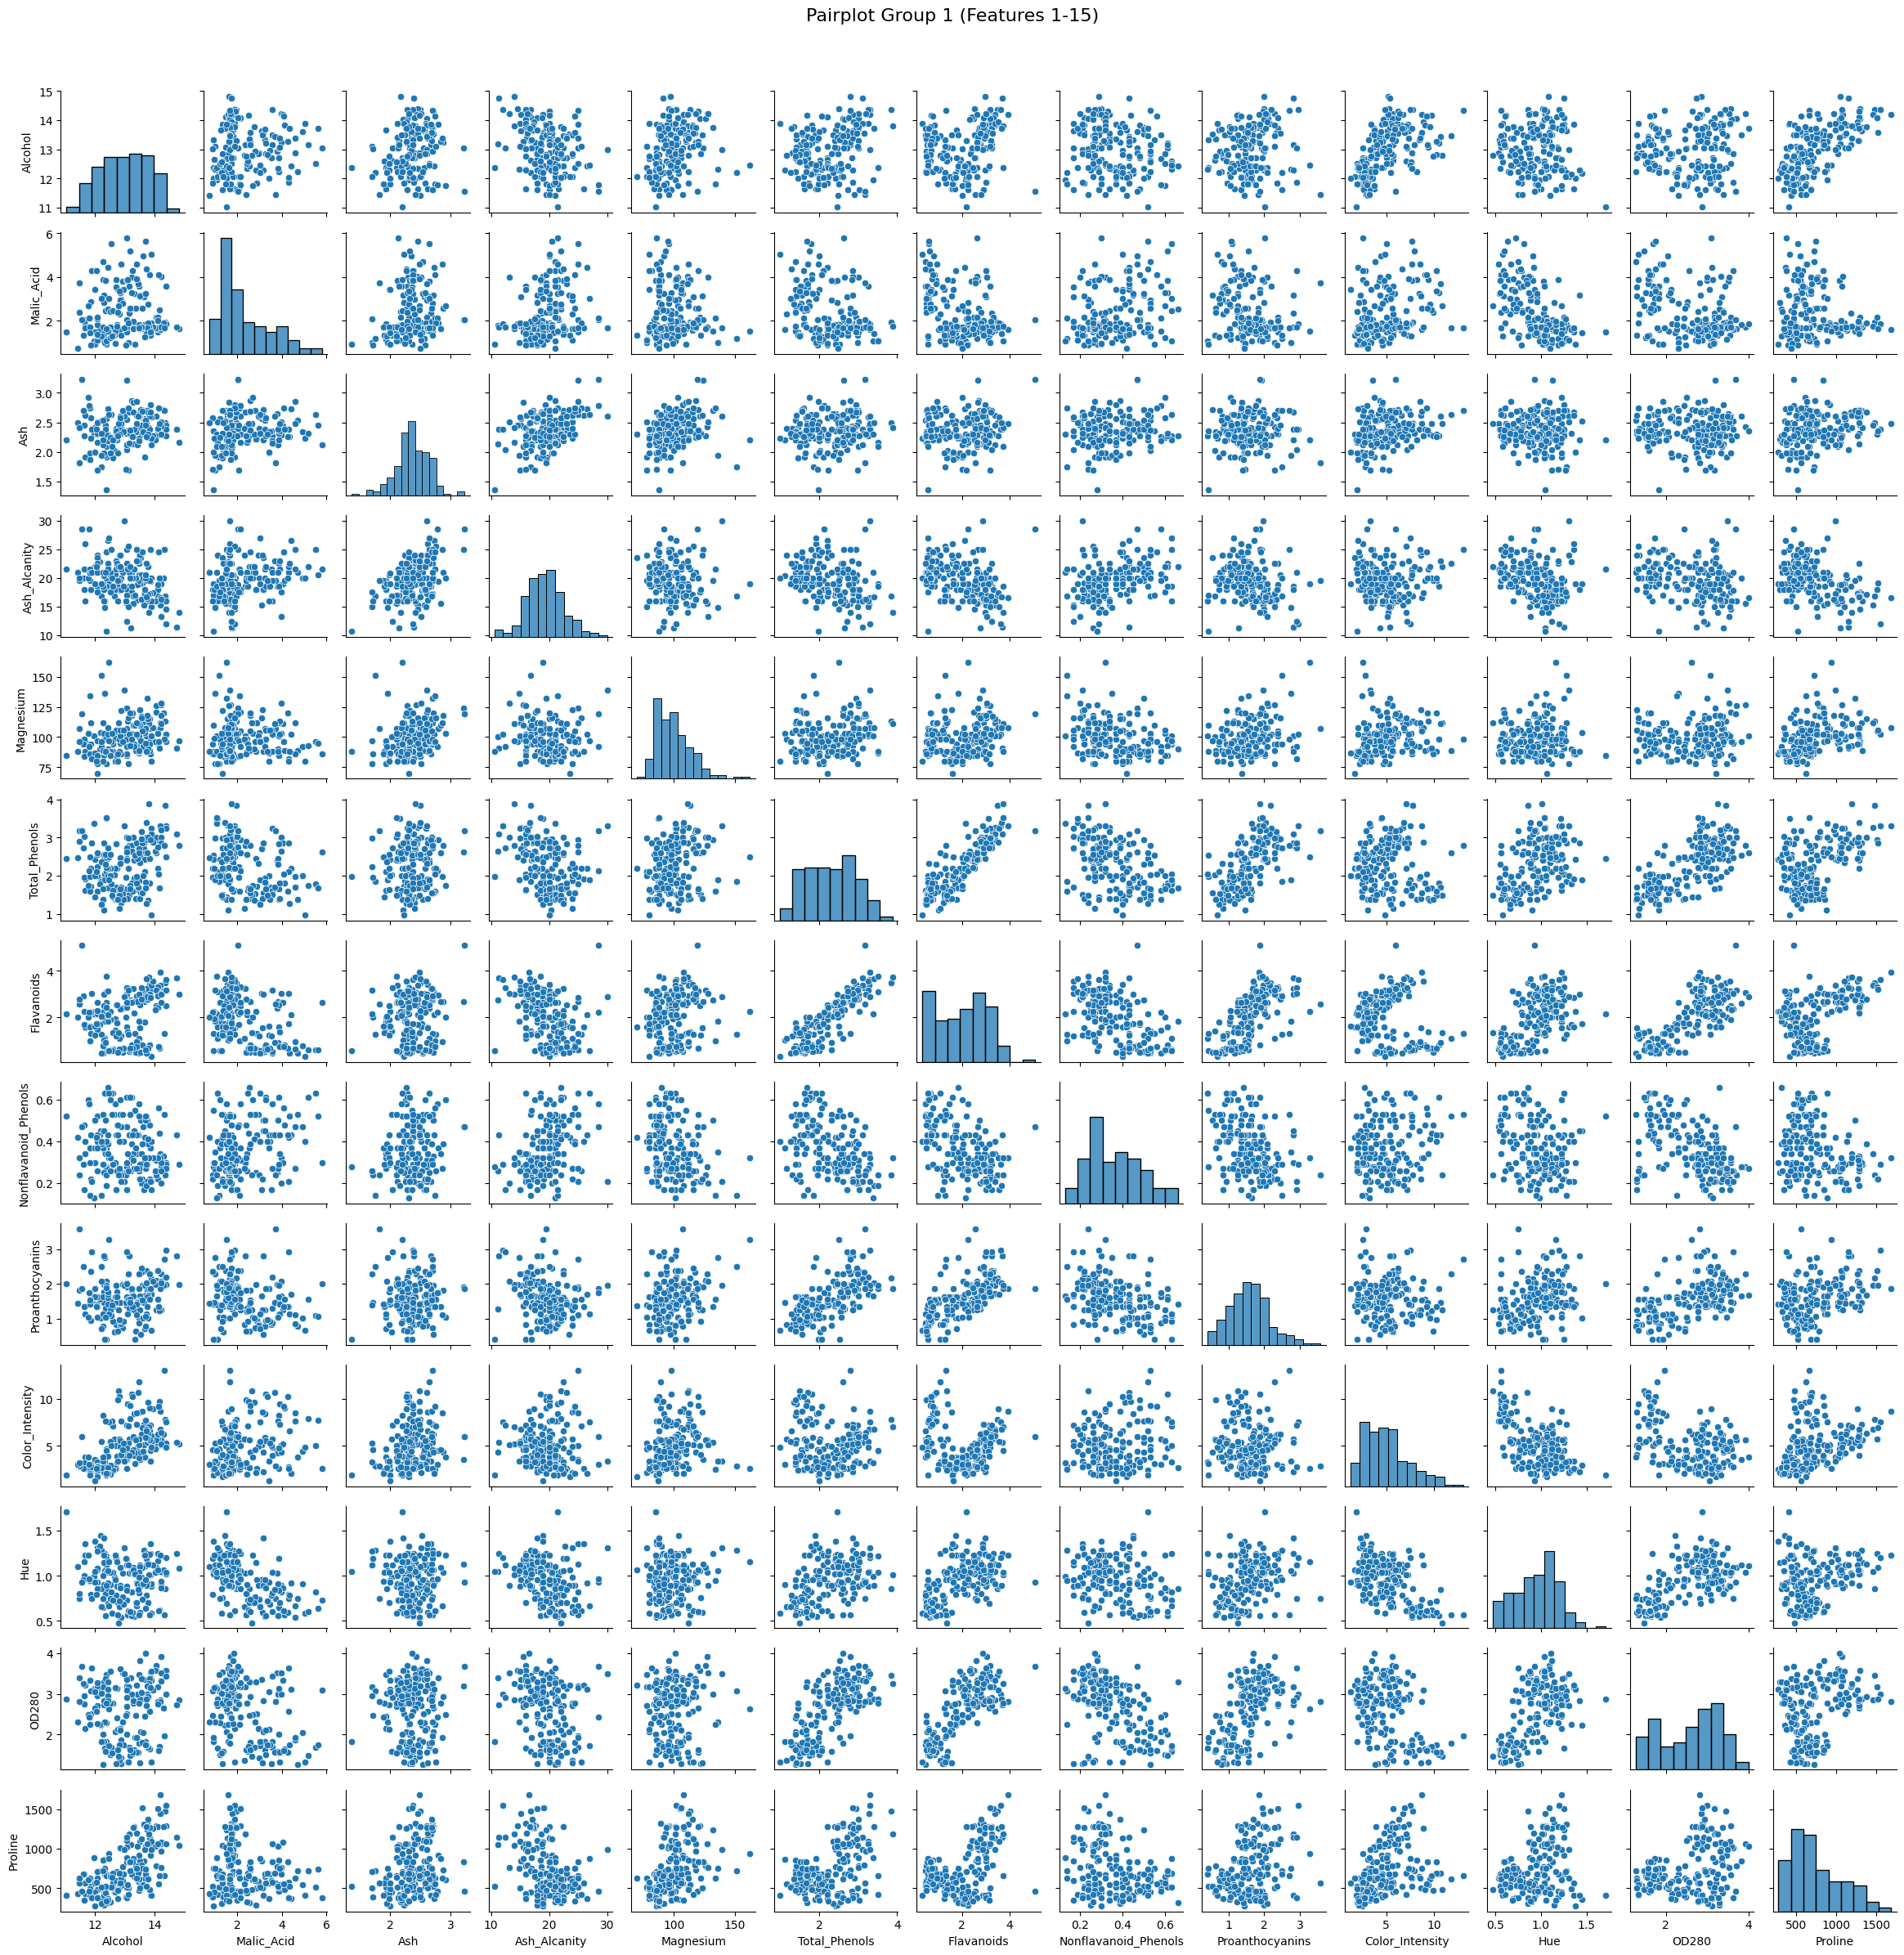

In [21]:
plt.figure(figsize=(20, 20))
g1 = sns.pairplot(dff.drop(columns="Customer_Segment"), height=1.8, corner=False)
plt.suptitle('Pairplot Group 1 (Features 1-15)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

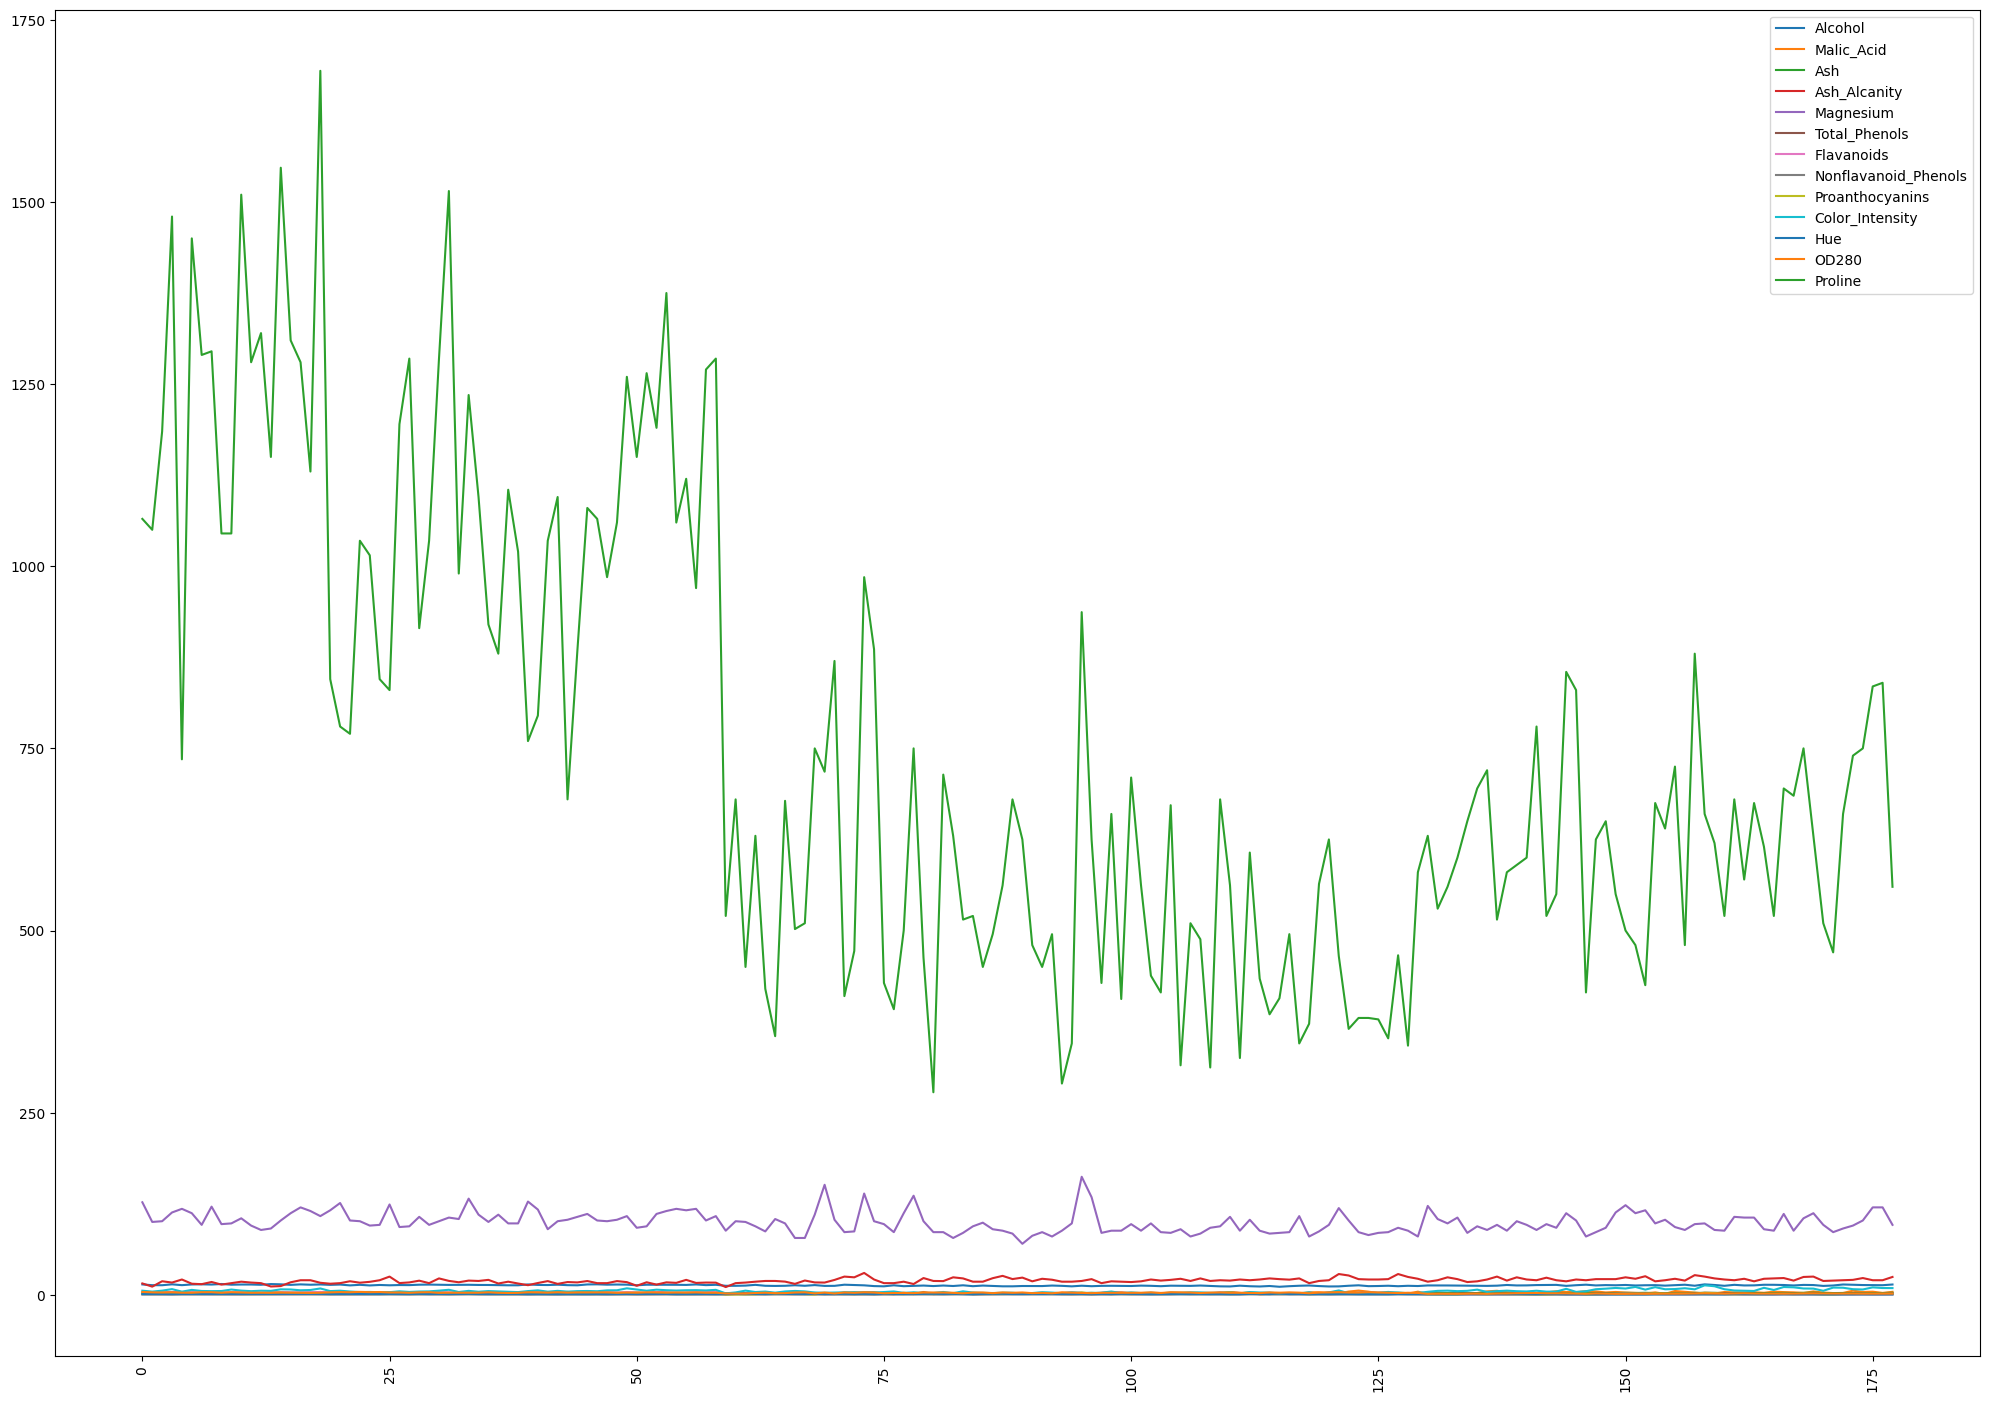

In [22]:
dff.drop(['Customer_Segment'], axis=1).plot(figsize=(20, 14))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

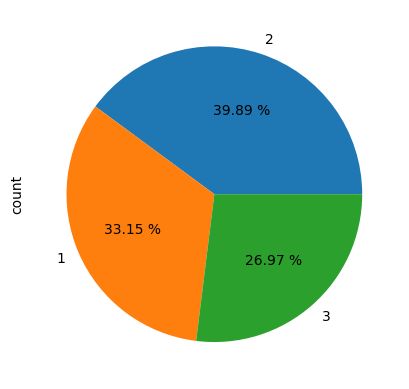

In [23]:
dff['Customer_Segment'].value_counts().plot(kind='pie', autopct = '%.2f %%')

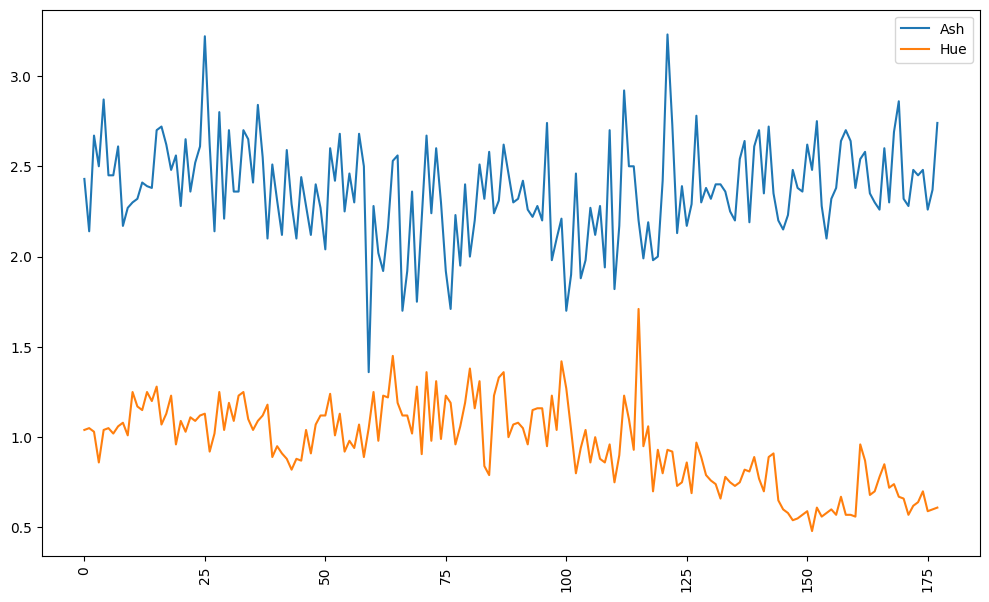

In [24]:
dff[['Ash','Hue']].plot(figsize=(10, 6))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Customer_Segment', ylabel='Proline'>

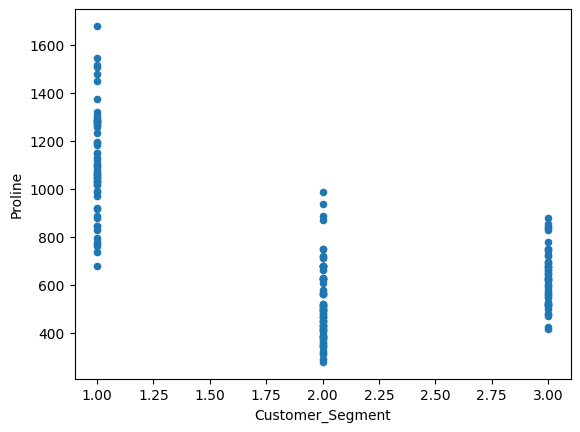

In [25]:
dff.plot(kind= 'scatter', x = 'Customer_Segment', y = 'Proline')

<Axes: xlabel='Hue', ylabel='Proline'>

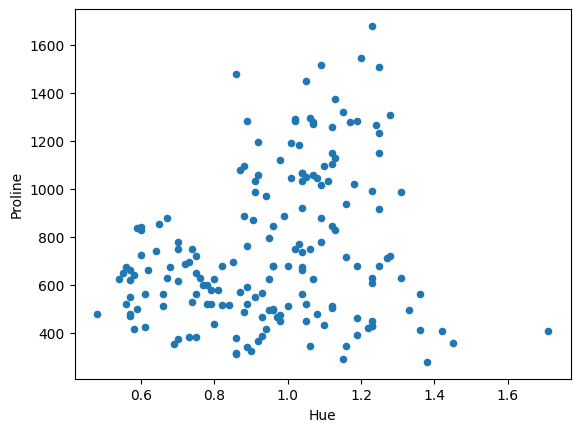

In [26]:
dff.plot(kind= 'scatter', x ='Hue', y = 'Proline')

<Axes: >

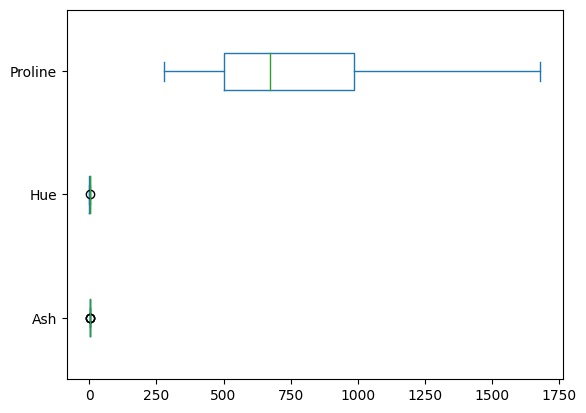

In [27]:
dff[['Ash','Hue','Proline']].plot(kind = 'box', vert = False)

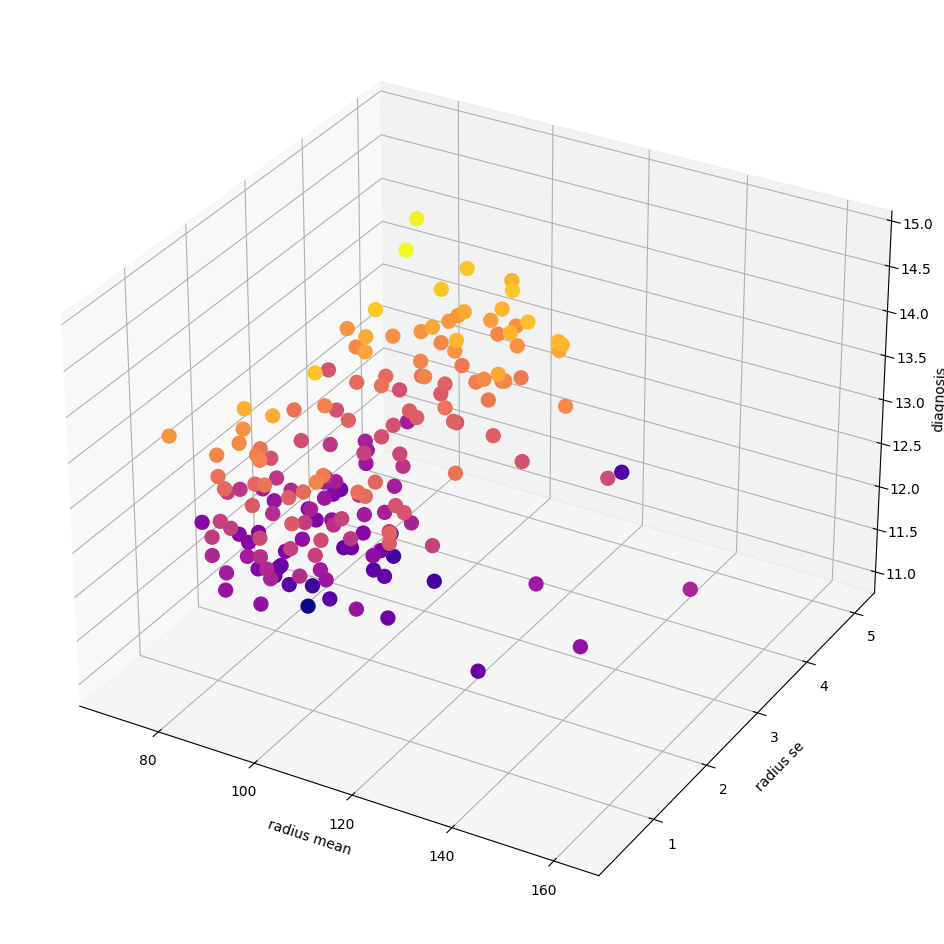

In [28]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x = dff["Magnesium"]
y = dff["Flavanoids"]
z = dff["Alcohol"]

ax.scatter(x, y, z, c=z, cmap='plasma', s=100, alpha=1)

ax.set_xlabel("radius mean")
ax.set_ylabel("radius se")
ax.set_zlabel("diagnosis")

plt.show()

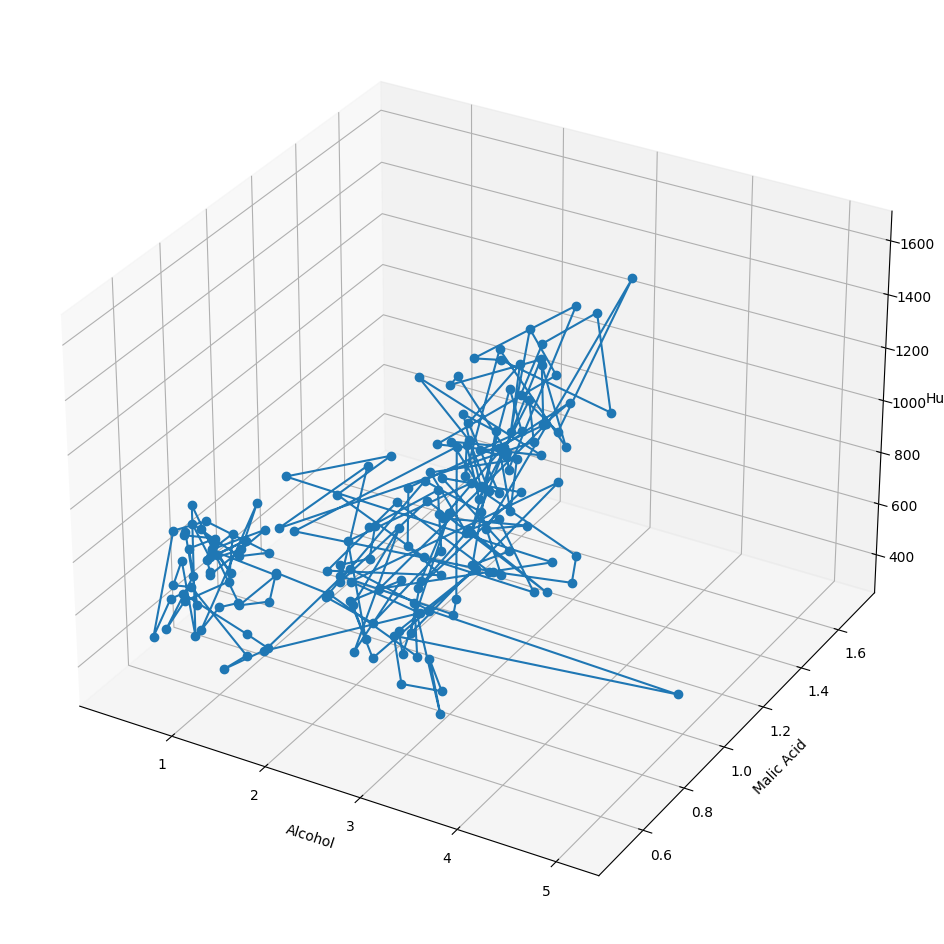

In [29]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot(dff["Flavanoids"], dff["Hue"], dff["Proline"], marker='o')

ax.set_xlabel("Alcohol")
ax.set_ylabel("Malic Acid")
ax.set_zlabel("Hue")

plt.show()

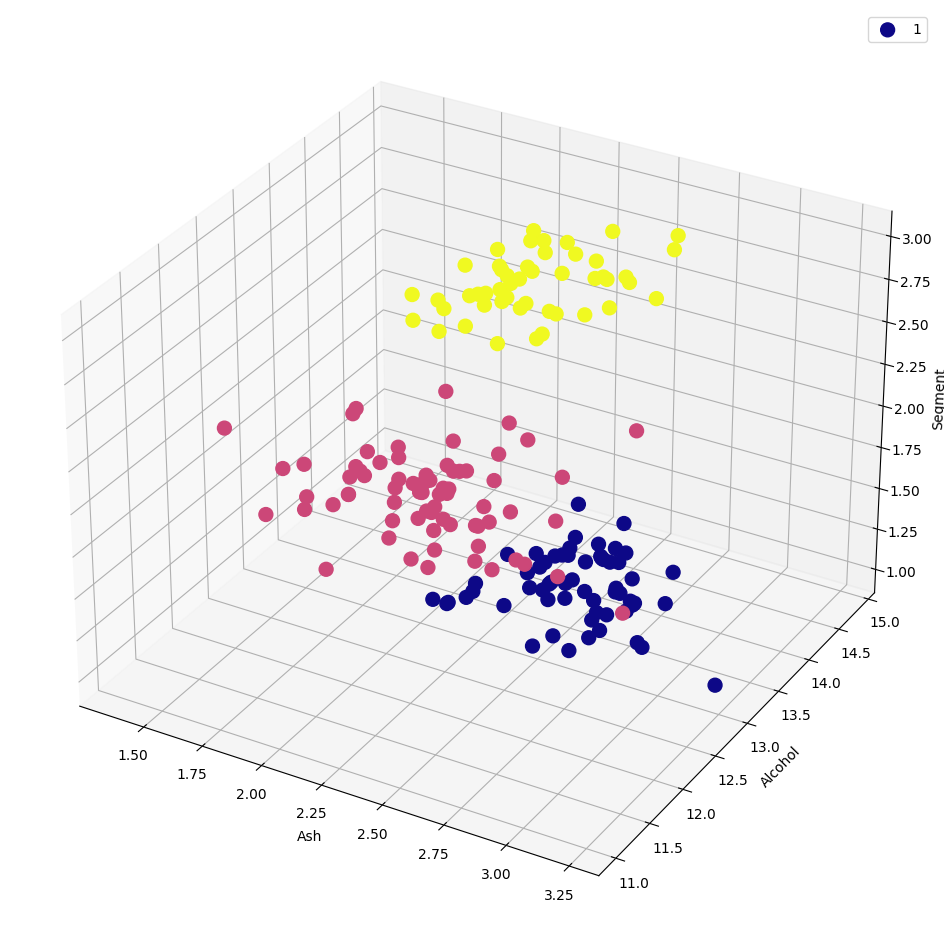

In [32]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')


x = dff["Ash"]
y = dff["Alcohol"]
z = dff["Customer_Segment"]

ax.scatter(x, y, z, c=z, cmap='plasma', s=100, alpha=1)

ax.set_xlabel("Ash")
ax.set_ylabel("Alcohol")
ax.set_zlabel("Segment")
plt.legend(z)
plt.show()

In [33]:
alpha = 0.05 

normality_results = {}

for col in dff.drop(columns="Customer_Segment", axis=1).columns:  
    stat, p = stats.shapiro(dff[col].dropna()) 
    normal = "Tidak Normal" if p < alpha else "Normal"
    
    normality_results[col] = {"Statistik": stat, "p-value": p, "Keterangan": normal}

for col, result in normality_results.items():
    print(f"Uji Normalitas {col}: Statistik={result['Statistik']:.4f}, p-value={result['p-value']:.4f} -> {result['Keterangan']}")

Uji Normalitas Alcohol: Statistik=0.9818, p-value=0.0201 -> Tidak Normal
Uji Normalitas Malic_Acid: Statistik=0.8888, p-value=0.0000 -> Tidak Normal
Uji Normalitas Ash: Statistik=0.9839, p-value=0.0387 -> Tidak Normal
Uji Normalitas Ash_Alcanity: Statistik=0.9902, p-value=0.2639 -> Normal
Uji Normalitas Magnesium: Statistik=0.9383, p-value=0.0000 -> Tidak Normal
Uji Normalitas Total_Phenols: Statistik=0.9767, p-value=0.0044 -> Tidak Normal
Uji Normalitas Flavanoids: Statistik=0.9545, p-value=0.0000 -> Tidak Normal
Uji Normalitas Nonflavanoid_Phenols: Statistik=0.9625, p-value=0.0001 -> Tidak Normal
Uji Normalitas Proanthocyanins: Statistik=0.9807, p-value=0.0145 -> Tidak Normal
Uji Normalitas Color_Intensity: Statistik=0.9403, p-value=0.0000 -> Tidak Normal
Uji Normalitas Hue: Statistik=0.9813, p-value=0.0174 -> Tidak Normal
Uji Normalitas OD280: Statistik=0.9450, p-value=0.0000 -> Tidak Normal
Uji Normalitas Proline: Statistik=0.9312, p-value=0.0000 -> Tidak Normal


In [34]:
alpha = 0.05

X_feature = dff.drop(['Customer_Segment'], axis=1)
X_OLS = sm.add_constant(X_feature)
y_OLS = dff['Customer_Segment'] 

X_OLS = X_OLS.dropna()
y_OLS = y_OLS.loc[X_OLS.index]

model_OLS = sm.OLS(y_OLS, X_OLS).fit()

f_statistic = model_OLS.fvalue
f_pvalue = model_OLS.f_pvalue
r_squared = model_OLS.rsquared

keterangan_f = "Tolak H0: Model signifikan (minimal ada 1 fitur berpengaruh)" if f_pvalue < alpha else "Gagal Tolak H0: Model tidak signifikan"

print("\nHasil Analisis Regresi OLS:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value (F-test): {f_pvalue:.4f}")
print(f"Koefisien Determinasi (R-squared): {r_squared:.4f}")
print(f"Kesimpulan F-test: {keterangan_f}")

print("\nKoefisien dan Signifikansi Variabel:")
for var in X_feature.columns:
    coef = model_OLS.params[var]
    pval = model_OLS.pvalues[var]
    signif = "Signifikan" if pval < alpha else "Tidak signifikan"
    print(f"{var}: koef={coef:.4f}, p-value={pval:.4f} -> {signif}")

print("\nRingkasan Lengkap Model:")
print(model_OLS.summary())


Hasil Analisis Regresi OLS:
F-statistic: 113.6507
p-value (F-test): 0.0000
Koefisien Determinasi (R-squared): 0.9001
Kesimpulan F-test: Tolak H0: Model signifikan (minimal ada 1 fitur berpengaruh)

Koefisien dan Signifikansi Variabel:
Alcohol: koef=-0.1170, p-value=0.0018 -> Signifikan
Malic_Acid: koef=0.0302, p-value=0.1729 -> Tidak signifikan
Ash: koef=-0.1486, p-value=0.1515 -> Tidak signifikan
Ash_Alcanity: koef=0.0399, p-value=0.0000 -> Signifikan
Magnesium: koef=-0.0005, p-value=0.7592 -> Tidak signifikan
Total_Phenols: koef=0.1443, p-value=0.0246 -> Signifikan
Flavanoids: koef=-0.3724, p-value=0.0000 -> Signifikan
Nonflavanoid_Phenols: koef=-0.3035, p-value=0.1426 -> Tidak signifikan
Proanthocyanins: koef=0.0394, p-value=0.4034 -> Tidak signifikan
Color_Intensity: koef=0.0756, p-value=0.0000 -> Signifikan
Hue: koef=-0.1492, p-value=0.2659 -> Tidak signifikan
OD280: koef=-0.2701, p-value=0.0000 -> Signifikan
Proline: koef=-0.0007, p-value=0.0000 -> Signifikan

Ringkasan Lengkap 

In [35]:
residuals_squared = model_OLS.resid ** 2

bp_test = het_breuschpagan(model_OLS.resid, model_OLS.model.exog)

alpha = 0.05
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
result = dict(zip(labels, bp_test))

print(f"LM Statistic: {result['Lagrange multiplier statistic']:.4f}")
print(f"p-value: {result['p-value']:.4f}")
print(f"F-statistic: {result['f-value']:.4f}")
print(f"F p-value: {result['f p-value']:.4f}")

if result['p-value'] < alpha:
    print("\nKesimpulan: Tolak H0 - Terdapat bukti heteroskedastisitas (p = {:.4f})".format(result['p-value']))
else:
    print("\nKesimpulan: Gagal tolak H0 - Tidak ada bukti heteroskedastisitas (p = {:.4f})".format(result['p-value']))

print("\n[Catatan]")
print("1. Jika terdeteksi heteroskedastisitas, pertimbangkan:")
print("   - Transformasi variabel dependen (log, sqrt)")
print("   - Model WLS (Weighted Least Squares)")
print("   - Error standar robust (Huber-White)")

LM Statistic: 17.7075
p-value: 0.1689
F-statistic: 1.3936
F p-value: 0.1672

Kesimpulan: Gagal tolak H0 - Tidak ada bukti heteroskedastisitas (p = 0.1689)

[Catatan]
1. Jika terdeteksi heteroskedastisitas, pertimbangkan:
   - Transformasi variabel dependen (log, sqrt)
   - Model WLS (Weighted Least Squares)
   - Error standar robust (Huber-White)


In [38]:
alpha = 0.05 
var_equal = True

kebawah = dff[dff['Customer_Segment'] == 1]['Proline'].dropna() 
menengah = dff[dff['Customer_Segment'] == 2]['Proline'].dropna()
keatas = dff[dff['Customer_Segment'] == 3]['Proline'].dropna()

shapiro_kebawah = stats.shapiro(kebawah)
shapiro_menengah = stats.shapiro(menengah)
shapiro_keatas = stats.shapiro(keatas)

levene_test = stats.levene(kebawah, menengah, keatas)

f_stat, p_value = stats.f_oneway(kebawah, menengah, keatas)

mean_kebawah = np.mean(kebawah)
mean_menengah = np.mean(menengah)
mean_keatas = np.mean(keatas)
std_kebawah = np.std(kebawah, ddof=1)
std_menengah = np.std(menengah, ddof=1)
std_keatas = np.std(keatas, ddof=1)
n_kebawah = len(kebawah)
n_menengah = len(menengah)
n_keatas = len(keatas)

if p_value < alpha:
    keterangan = "Tolak H0: Ada perbedaan signifikan secara statistik antara kelompok"
    # Post-hoc test jika ANOVA signifikan
    tukey = pairwise_tukeyhsd(endog=dff['Proline'].dropna(),
                             groups=dff['Customer_Segment'].dropna(),
                             alpha=alpha)
else:
    keterangan = "Gagal tolak H0: Tidak ada bukti perbedaan signifikan antara kelompok"

print(f"Variabel yang diuji: 'Proline' berdasarkan Customer_Segment")
print(f"\n[Deskripsi Kelompok]")
print(f"Segment 1 (n={n_kebawah}): Mean = {mean_kebawah:.2f}, SD = {std_kebawah:.2f}")
print(f"Segment 2 (n={n_menengah}): Mean = {mean_menengah:.2f}, SD = {std_menengah:.2f}")
print(f"Segment 3 (n={n_keatas}): Mean = {mean_keatas:.2f}, SD = {std_keatas:.2f}")

print(f"\n[Uji Normalitas Shapiro-Wilk]")
print(f"Segment 1: Statistik = {shapiro_kebawah.statistic:.4f}, p-value = {shapiro_kebawah.pvalue:.4f}")
print(f"Segment 2: Statistik = {shapiro_menengah.statistic:.4f}, p-value = {shapiro_menengah.pvalue:.4f}")
print(f"Segment 3: Statistik = {shapiro_keatas.statistic:.4f}, p-value = {shapiro_keatas.pvalue:.4f}")

print(f"\n[Uji Kesamaan Varians Levene]")
print(f"Statistik = {levene_test.statistic:.4f}, p-value = {levene_test.pvalue:.4f}")

print(f"\n[Hasil Uji ANOVA]")
print(f"Statistik F = {f_stat:.4f}")
print(f"p-value = {p_value:.4f}")
print(f"Kesimpulan: {keterangan} (α = {alpha})")

if p_value < alpha:
    print(f"\n[Post-hoc Tukey HSD Test]")
    print(tukey.summary())

print("\n[Catatan]")
print("1. ANOVA digunakan karena membandingkan lebih dari 2 kelompok")
print("2. Pastikan asumsi normalitas dan homogenitas varians terpenuhi")
print("3. Jika asumsi tidak terpenuhi, pertimbangkan uji Kruskal-Wallis (non-parametrik)")

Variabel yang diuji: 'Proline' berdasarkan Customer_Segment

[Deskripsi Kelompok]
Segment 1 (n=59): Mean = 1115.71, SD = 221.52
Segment 2 (n=71): Mean = 519.51, SD = 157.21
Segment 3 (n=48): Mean = 629.90, SD = 115.10

[Uji Normalitas Shapiro-Wilk]
Segment 1: Statistik = 0.9819, p-value = 0.5233
Segment 2: Statistik = 0.9387, p-value = 0.0018
Segment 3: Statistik = 0.9769, p-value = 0.4585

[Uji Kesamaan Varians Levene]
Statistik = 8.5133, p-value = 0.0003

[Hasil Uji ANOVA]
Statistik F = 207.9204
p-value = 0.0000
Kesimpulan: Tolak H0: Ada perbedaan signifikan secara statistik antara kelompok (α = 0.05)

[Post-hoc Tukey HSD Test]
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     1      2 -596.2048    0.0 -667.9787 -524.4309   True
     1      3  -485.816    0.0 -565.0106 -406.6215   True
     2      3  110.3888 0.0022   34.2556  186.5219   True
--------------

In [39]:
vif_data = pd.DataFrame()
vif_data["Variabel"] = X_feature.columns
vif_data["VIF"] = [variance_inflation_factor(X_feature.values, i) for i in range(X_feature.shape[1])]

def interpret_vif(vif):
    if vif < 5:
        return "Tidak ada masalah multikolinearitas"
    elif 5 <= vif < 10:
        return "Indikasi multikolinearitas"
    else:
        return "Multikolinearitas tinggi (perlu perhatian)"

vif_data["Keterangan"] = vif_data["VIF"].apply(interpret_vif)

print(vif_data)

                Variabel         VIF  \
0                Alcohol  206.189057   
1             Malic_Acid    8.925541   
2                    Ash  165.640370   
3           Ash_Alcanity   73.141564   
4              Magnesium   67.364868   
5          Total_Phenols   62.786935   
6             Flavanoids   35.535602   
7   Nonflavanoid_Phenols   16.636708   
8        Proanthocyanins   17.115665   
9        Color_Intensity   17.022272   
10                   Hue   45.398407   
11                 OD280   54.539165   
12               Proline   16.370828   

                                    Keterangan  
0   Multikolinearitas tinggi (perlu perhatian)  
1                   Indikasi multikolinearitas  
2   Multikolinearitas tinggi (perlu perhatian)  
3   Multikolinearitas tinggi (perlu perhatian)  
4   Multikolinearitas tinggi (perlu perhatian)  
5   Multikolinearitas tinggi (perlu perhatian)  
6   Multikolinearitas tinggi (perlu perhatian)  
7   Multikolinearitas tinggi (perlu perhatian) 

In [40]:
group1 = dff[dff['Customer_Segment'] == 1]['Ash'].dropna()
group2 = dff[dff['Customer_Segment'] == 2]['Ash'].dropna()
group3 = dff[dff['Customer_Segment'] == 3]['Ash'].dropna()

bartlett_test = stats.bartlett(group1, group2, group3)

statistik = bartlett_test.statistic
p_value = bartlett_test.pvalue 

if p_value < alpha:
    keterangan = "Tolak H0: Varians berbeda signifikan (heteroskedastisitas)"
else:
    keterangan = "Gagal tolak H0: Tidak ada bukti varians berbeda (homoskedastisitas)"

print("\nHasil Uji Bartlett untuk Kesamaan Varians:")
print(f"Variabel yang diuji: radius_se (standard error radius)")
print(f"Statistik Bartlett: {statistik:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Kesimpulan: {keterangan}")
print(f"Jumlah sampel - kustomer kebawah: {len(group1)}, kustomer menengah: {len(group2)}, kustomer keatas: {len(group3)}")
print(f"Varians - kustomer kebawah: {group1.var():.4f}, kustomer menengah: {group2.var():.4f}, kustomer keatas: {group3.var():.4f}")


Hasil Uji Bartlett untuk Kesamaan Varians:
Variabel yang diuji: radius_se (standard error radius)
Statistik Bartlett: 16.6049
p-value: 0.0002
Kesimpulan: Tolak H0: Varians berbeda signifikan (heteroskedastisitas)
Jumlah sampel - kustomer kebawah: 59, kustomer menengah: 71, kustomer keatas: 48
Varians - kustomer kebawah: 0.0516, kustomer menengah: 0.0995, kustomer keatas: 0.0341


In [41]:
kmo_all, kmo_model = calculate_kmo(dff[['Ash', 'Hue', 'Customer_Segment']].dropna())
print(f"KMO: {kmo_model}")

print("\nInterpretasi KMO Overall:")

if kmo_model >= 0.90:
    print("Kecukupan sampel SANGAT BAIK untuk analisis faktor")
elif kmo_model >= 0.80:
    print("Kecukupan sampel BAIK untuk analisis faktor")
elif kmo_model >= 0.70:
    print("Kecukupan sampel CUKUP untuk analisis faktor")
elif kmo_model >= 0.60:
    print("Kecukupan sampel MINIMAL untuk analisis faktor")
else:
    print("Kecukupan sampel TIDAK MEMADAI untuk analisis faktor")
    
print("\nRekomendasi:")
if kmo_model < 0.60:
    print("1. Pertimbangkan untuk menambah sampel")
    print("2. Periksa variabel dengan KMO individual rendah (<0.50)")
    print("3. Pertimbangkan metode analisis alternatif")

KMO: 0.4799402638760744

Interpretasi KMO Overall:
Kecukupan sampel TIDAK MEMADAI untuk analisis faktor

Rekomendasi:
1. Pertimbangkan untuk menambah sampel
2. Periksa variabel dengan KMO individual rendah (<0.50)
3. Pertimbangkan metode analisis alternatif


In [42]:
contingency_table = pd.crosstab(dff['Customer_Segment'], dff['Alcohol'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2={chi2}, p-value={p}")

print(f"\nChi-Square Test:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of Freedom = {dof}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
print(f"\nKesimpulan: {'Tolak H0: Ada hubungan signifikan' if p < alpha else 'Gagal tolak H0: Tidak ada hubungan signifikan'}")

Chi-Square Test: Chi2=292.8192007506432, p-value=0.03253389175671757

Chi-Square Test:
Chi2 Statistic = 292.8192
p-value = 0.0325
Degrees of Freedom = 250

Contingency Table:
Alcohol           11.03  11.41  11.45  11.46  11.56  11.61  11.62  11.64  \
Customer_Segment                                                           
1                     0      0      0      0      0      0      0      0   
2                     1      1      1      1      1      1      1      1   
3                     0      0      0      0      0      0      0      0   

Alcohol           11.65  11.66  ...  14.21  14.22  14.23  14.30  14.34  14.37  \
Customer_Segment                ...                                             
1                     0      0  ...      1      2      1      1      0      1   
2                     1      1  ...      0      0      0      0      0      0   
3                     0      0  ...      0      0      0      0      1      0   

Alcohol           14.38  14.39  14.75 

In [48]:
manova = MANOVA.from_formula('Alcohol + Flavanoids ~ Customer_Segment', data=dff.dropna())
manova_result = manova.mv_test()

# Print the full MANOVA results
print(manova_result)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0176 2.0000 175.0000 4883.3559 0.0000
         Pillai's trace  0.9824 2.0000 175.0000 4883.3559 0.0000
 Hotelling-Lawley trace 55.8098 2.0000 175.0000 4883.3559 0.0000
    Roy's greatest root 55.8098 2.0000 175.0000 4883.3559 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
      Customer_Segment    Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.2645 2.0000 175.0000 243.2879 0.0000
           Pillai's trace 0.7355 2.0000 175.0

In [49]:
alpha = 0.05 

def mardias_test(data):
    n, p = data.shape
    mean = data.mean(axis=0)
    cov = data.cov()
    inv_cov = np.linalg.inv(cov)
    centered_data = data - mean
    skewness = np.sum(np.dot(centered_data, inv_cov) ** 3) / n
    kurtosis = np.sum(np.dot(centered_data, inv_cov) ** 4) / n
    return skewness, kurtosis

numerical_data = X_feature.select_dtypes(include=[np.number])

skewness, kurtosis = mardias_test(numerical_data)

p = numerical_data.shape[1]
df_skewness = p * (p + 1) * (p + 2) / 6
expected_kurtosis = p * (p + 2)

interpretasi_skewness = "Data tidak normal multivariat (tolak H0)" if skewness > stats.chi2.ppf(1-alpha, df_skewness) else "Tidak ada bukti untuk menolak normalitas multivariat (gagal tolak H0)"

interpretasi_kurtosis = "Data tidak normal multivariat (tolak H0)" if abs(kurtosis - expected_kurtosis) > 2*np.sqrt(8*p*(p+2)/len(numerical_data)) else "Tidak ada bukti untuk menolak normalitas multivariat (gagal tolak H0)"

print("\nHasil Uji Normalitas Multivariat Mardia:")
print(f"Jumlah observasi (n): {len(numerical_data)}")
print(f"Jumlah variabel (p): {p}")
print(f"\nKoefisien Skewness Mardia: {skewness:.4f}")
print(f"Nilai kritis Chi-square (α=0.05, df={df_skewness:.0f}): {stats.chi2.ppf(1-alpha, df_skewness):.4f}")
print(f"Interpretasi Skewness: {interpretasi_skewness}")
print(f"\nKoefisien Kurtosis Mardia: {kurtosis:.4f}")
print(f"Nilai harapan kurtosis: {expected_kurtosis:.4f}")
print(f"Interpretasi Kurtosis: {interpretasi_kurtosis}")
print(f"\nCatatan:")
print("1. Uji ini sensitif terhadap ukuran sampel besar")
print("2. Untuk dataset besar, pertimbangkan juga uji normalitas univariat untuk tiap variabel")
print("3. Jika normalitas tidak terpenuhi, pertimbangkan transformasi data atau metode non-parametrik")


Hasil Uji Normalitas Multivariat Mardia:
Jumlah observasi (n): 178
Jumlah variabel (p): 13

Koefisien Skewness Mardia: 306.2688
Nilai kritis Chi-square (α=0.05, df=455): 505.7297
Interpretasi Skewness: Tidak ada bukti untuk menolak normalitas multivariat (gagal tolak H0)

Koefisien Kurtosis Mardia: 63505.0102
Nilai harapan kurtosis: 195.0000
Interpretasi Kurtosis: Data tidak normal multivariat (tolak H0)

Catatan:
1. Uji ini sensitif terhadap ukuran sampel besar
2. Untuk dataset besar, pertimbangkan juga uji normalitas univariat untuk tiap variabel
3. Jika normalitas tidak terpenuhi, pertimbangkan transformasi data atau metode non-parametrik


=======================================================================================================================================================

In [126]:
dff = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\wine.csv")
dff.head(5)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [127]:
ordinal_mapping = {
     1: 'kebawah',
     2: 'menengah',
     3:'keatas',
}

In [128]:
dff['Customer_Segment'] = dff['Customer_Segment'].replace(ordinal_mapping)

In [129]:
dff.dropna(inplace=True)
dff.drop_duplicates(inplace=True)

In [130]:
dff.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline Customer_Segment  
0   3.92     1065          kebawah  
1   3.40     1050          kebawah  
2   3.17     1185          kebawah  
3   3.45     1480          kebawah  
4   2.93      735          kebawah

In [131]:
X = dff.drop(columns=['Customer_Segment'])
y = dff['Customer_Segment']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=42, stratify=y)

In [133]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

In [134]:
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('le', LabelBinarizer())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [135]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('fs',SelectKBest(score_func=f_classif)),
    ('pca',PCA()),
    ('logit', LogisticRegression(multi_class='multinomial',
        class_weight='balanced',
        random_state=42
    ))
])

In [136]:
param_grid = {
    'logit__C' :[0.01, 1, 10],
    'logit__solver':['liblinear', 'saga','lbfgs'],
    'logit__penalty': ['l1', 'l2','elasticnet'],
    'pca__n_components':[1,2,3],
    'fs__k':[4,7,11]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model,
param_grid=param_grid,
scoring='accuracy',
cv=cv,
n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameter:",grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameter: {'fs__k': 11, 'logit__C': 1, 'logit__penalty': 'l1', 'logit__solver': 'saga', 'pca__n_components': 2}
Best Score: 0.9739130434782609


C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
810 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Robyi\Ap

In [137]:
best_params = {
    'logit__C': 1,
    'logit__solver': 'saga',
    'logit__penalty': 'l1',
    'fs__k': 11,
    'pca__n_components':2
}

def objective(trial):
    k = trial.suggest_int('fs__k', 8, X_train.shape[1])
    
    model.set_params(
        logit__C=best_params['logit__C'],
        logit__solver=best_params['logit__solver'],
        logit__penalty=best_params['logit__penalty'],
        fs__k=k,
        pca__n_components=best_params['pca__n_components']

    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [138]:
from optuna.samplers import TPESampler

In [139]:
study = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=42))
    
study.optimize(objective, n_trials = 100)

print("\nBest parameters from Optuna:")
print(study.best_params)
print(f"Best accuracy: {study.best_value:.4f}")

[I 2025-04-02 02:23:22,172] A new study created in memory with name: no-name-43305cea-4a43-4381-b7c0-9a87a343e8f9
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2025-04-02 02:23:22,433] Trial 0 finished with value: 0.9841269841269841 and parameters: {'fs__k': 10}. Best is trial 0 with value: 0.9841269841269841.
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From 


Best parameters from Optuna:
{'fs__k': 10}
Best accuracy: 0.9841


In [140]:
model.set_params(**study.best_params)
model.fit(X_train, y_train)
final_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")


Final Test Accuracy: 0.9841


C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [141]:
probabilities = model.predict_proba(X_test)
print(probabilities)

[[6.40848636e-04 9.99356280e-01 2.87129787e-06]
 [1.28845712e-03 7.36813440e-02 9.25030199e-01]
 [9.89681219e-01 1.03031429e-02 1.56378335e-05]
 [9.91896443e-01 8.08479690e-03 1.87596737e-05]
 [2.76594880e-03 9.97212654e-01 2.13974513e-05]
 [9.95520910e-01 4.47858718e-03 5.03068560e-07]
 [2.72721200e-04 9.32802083e-02 9.06447070e-01]
 [6.15717461e-05 8.47637976e-05 9.99853664e-01]
 [9.86953224e-01 1.26231168e-02 4.23658968e-04]
 [4.73622073e-01 1.58447755e-02 5.10533151e-01]
 [1.27110780e-05 5.77850692e-05 9.99929504e-01]
 [5.89368375e-03 9.87463050e-01 6.64326580e-03]
 [2.74741197e-03 9.96519698e-01 7.32890420e-04]
 [9.87386063e-01 1.25631090e-02 5.08276314e-05]
 [9.89082314e-01 9.87426413e-04 9.93025960e-03]
 [3.70395381e-05 2.72153567e-02 9.72747604e-01]
 [5.34925078e-03 9.17408819e-01 7.72419298e-02]
 [9.02291092e-01 9.17838306e-02 5.92507740e-03]
 [5.09918369e-03 9.94365111e-01 5.35704917e-04]
 [9.95328997e-01 4.66990804e-03 1.09466674e-06]
 [2.93529977e-04 9.99674662e-01 3.180760

In [142]:
y_pred = model.predict(X_test)

Text(113.9222222222222, 0.5, 'true value')

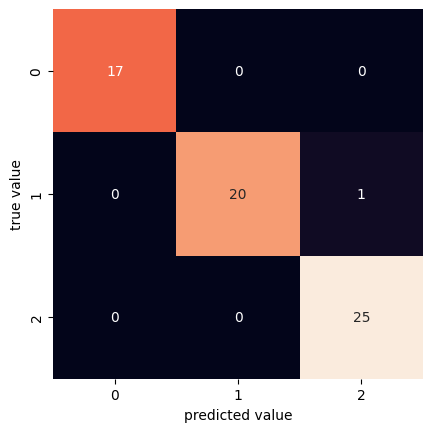

In [143]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, square  =True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

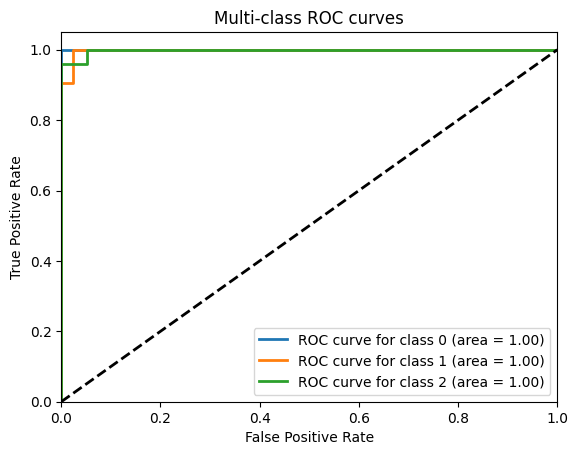

In [144]:
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], prob_estimate[:, i])
    roc_auc = auc(fpr, tpr)
    
    # Plot
    plt.plot(fpr, tpr, lw=2, 
             label=f'ROC curve for class {i} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC curves')
plt.legend(loc="lower right")
plt.show()

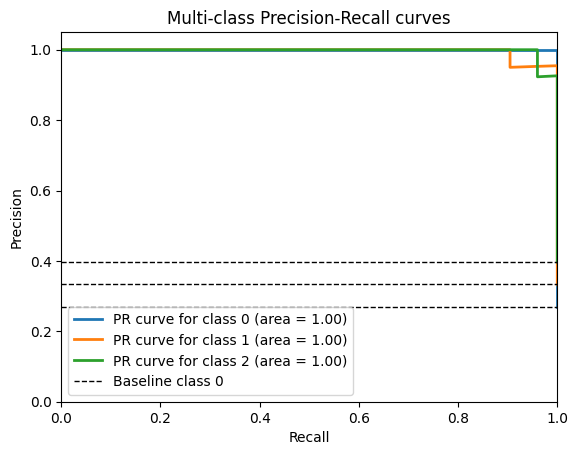

In [145]:
n_classes = len(np.unique(y_test))

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], prob_estimate[:, i])
    pr_auc = auc(recall, precision)
    
    # Plot
    plt.plot(recall, precision, lw=2, 
             label=f'PR curve for class {i} (area = {pr_auc:.2f})')

baseline = y_test_bin.mean(axis=0)
for i, b in enumerate(baseline):
    plt.plot([0, 1], [b, b], 'k--', lw=1, label=f'Baseline class {i}' if i == 0 else "")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multi-class Precision-Recall curves')
plt.legend(loc="best")
plt.show()

In [146]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9841269841269841

Classification Report:
              precision    recall  f1-score   support

      keatas       1.00      1.00      1.00        17
     kebawah       1.00      0.95      0.98        21
    menengah       0.96      1.00      0.98        25

    accuracy                           0.98        63
   macro avg       0.99      0.98      0.99        63
weighted avg       0.98      0.98      0.98        63



In [147]:
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached whic

Cross-Validation Scores: [0.86956522 0.95652174 1.         0.91304348 1.        ]
Mean CV Accuracy: 0.9478260869565218


In [173]:
all_features = preprocessor.get_feature_names_out()

feature_scores_df = pd.DataFrame({
    'Feature': all_features,
    'Score': best_kbest.scores_
}).sort_values('Score', ascending=False)

print("\nFeature Scores dari KBest:")
print(feature_scores_df.head(10))


Feature Scores dari KBest:
                      Feature       Score
6             num__Flavanoids  157.048355
12               num__Proline  134.468318
11                 num__OD280  119.755419
0                num__Alcohol   80.490124
9        num__Color_Intensity   68.271625
5          num__Total_Phenols   65.576911
10                   num__Hue   52.450501
8        num__Proanthocyanins   26.521561
1             num__Malic_Acid   24.278051
7   num__Nonflavanoid_Phenols   21.205299


In [178]:
selected_features = best_kbest.get_feature_names_out(preprocessor.get_feature_names_out())

selected_scores = best_kbest.scores_[best_kbest.get_support()]

loadings = best_pca.components_.T

print(f"Jumlah fitur terpilih: {len(selected_features)}")
print(f"Jumlah skor terpilih: {len(selected_scores)}") 
print(f"Dimensi loadings: {loadings.shape}")

combined_df = pd.DataFrame({
    'Feature': selected_features,
    'KBest_Score': selected_scores
})

for i in range(best_pca.n_components_):
    combined_df[f'PC{i+1}'] = loadings[:, i]

print("\nKombinasi Feature Scores dan PCA Loadings:")
print(combined_df)

Jumlah fitur terpilih: 10
Jumlah skor terpilih: 10
Dimensi loadings: (10, 2)

Kombinasi Feature Scores dan PCA Loadings:
                     Feature  KBest_Score       PC1       PC2
0               num__Alcohol    80.490124  0.114015  0.570719
1            num__Malic_Acid    24.278051 -0.274119  0.182319
2         num__Total_Phenols    65.576911  0.412379  0.069274
3            num__Flavanoids   157.048355  0.436299  0.015648
4  num__Nonflavanoid_Phenols    21.205299 -0.316523 -0.027819
5       num__Proanthocyanins    26.521561  0.339362  0.023811
6       num__Color_Intensity    68.271625 -0.085023  0.598238
7                   num__Hue    52.450501  0.302749 -0.241937
8                 num__OD280   119.755419  0.407767 -0.149855
9               num__Proline   134.468318  0.266332  0.442466


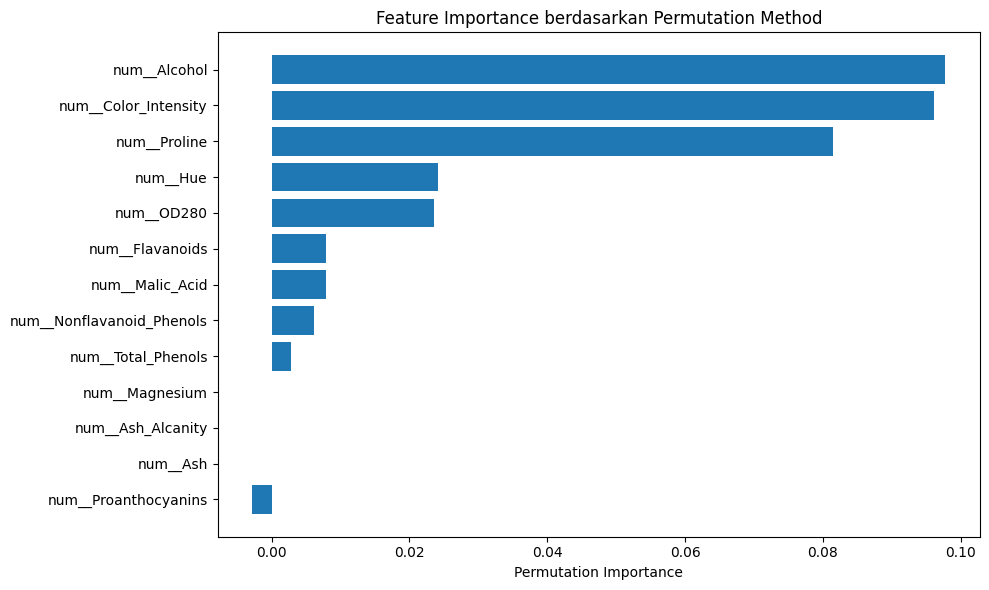

In [149]:
result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
importance = result.importances_mean

preprocessor = model.named_steps['preprocessor']
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    
sorted_idx = np.argsort(importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance berdasarkan Permutation Method')
plt.tight_layout()
plt.show()

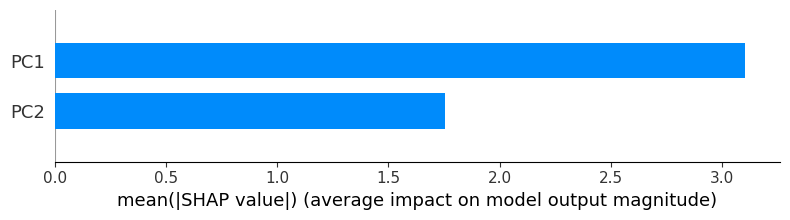

In [195]:
X_preprocessed = model.named_steps['preprocessor'].transform(X_train)

X_selected = model.named_steps['fs'].transform(X_preprocessed)

X_pca = model.named_steps['pca'].transform(X_selected)

explainer = shap.LinearExplainer(model.named_steps['logit'], X_pca)
shap_values = explainer.shap_values(X_pca)

shap_values_class0 = shap_values[1][:, :-1] 


shap.summary_plot(
    shap_values_class0,
    X_pca,
    feature_names=[f"PC{i+1}" for i in range(X_pca.shape[1])],
    plot_type="bar",
    show=False
)

In [150]:
majority_class_ratio = max(np.mean(y_test == 3), np.mean(y_test == 2), np.mean(y_test == 1))
accuracy = accuracy_score(y_test, y_pred)
successes = sum(y_test == y_pred) 
n = len(y_test)  
z_stat, p_value = proportions_ztest(count=successes, nobs=n, value=majority_class_ratio, alternative='larger')

print(f"Accuracy (ACC): {accuracy:.4f}")
print(f"No Information Rate (NIR): {majority_class_ratio:.4f}")
print(f"P value [ACC > NIR]: {p_value:.4f}")

Accuracy (ACC): 0.9841
No Information Rate (NIR): 0.0000
P value [ACC > NIR]: 0.0000


In [151]:
cm = confusion_matrix(y_test, y_pred)

# Hitung sensitivity (recall) & specificity untuk setiap kelas
sensitivity_per_class = cm.diagonal() / cm.sum(axis=1)  # TP / (TP + FN)
specificity_per_class = (cm.sum() - cm.sum(axis=1) - cm.sum(axis=0) + cm.diagonal()) / (cm.sum() - cm.sum(axis=1))  # TN / (TN + FP)

# Tampilkan hasil per kelas
for i, (sens, spec) in enumerate(zip(sensitivity_per_class, specificity_per_class), start=1):
    print(f"Kelas {i}: Sensitivity (Recall) = {sens:.4f}, Specificity = {spec:.4f}")

Kelas 1: Sensitivity (Recall) = 1.0000, Specificity = 1.0000
Kelas 2: Sensitivity (Recall) = 0.9524, Specificity = 1.0000
Kelas 3: Sensitivity (Recall) = 1.0000, Specificity = 0.9737


C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its de

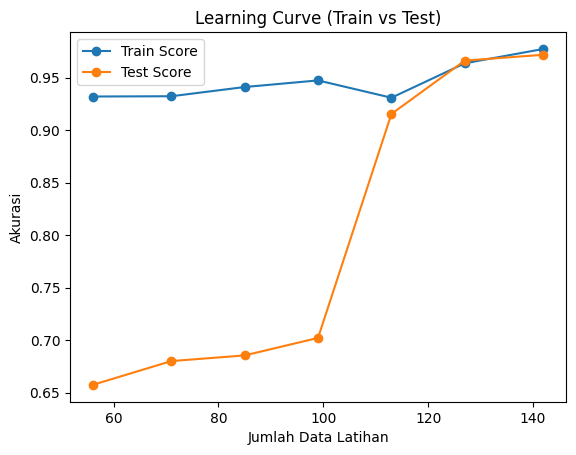

In [152]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=cv, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train Score", marker="o")
plt.plot(train_sizes, test_mean, label="Test Score", marker="o")
plt.xlabel("Jumlah Data Latihan")
plt.ylabel("Akurasi")
plt.legend()
plt.title("Learning Curve (Train vs Test)")
plt.show()

C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated

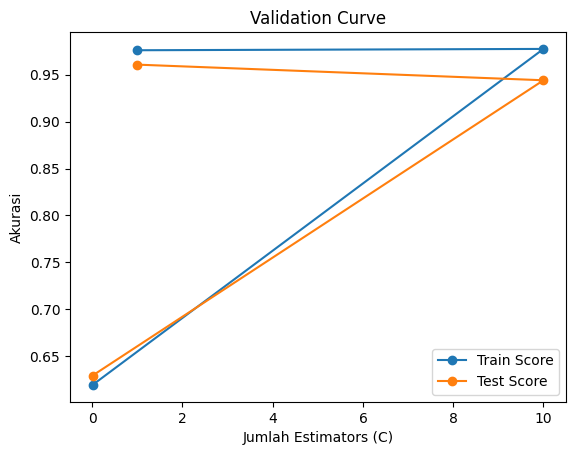

In [153]:
param_range = [0.01,10,1]
train_scores, test_scores = validation_curve(
    model, X, y, param_range=param_range, param_name="logit__C",
    cv=5, scoring="accuracy"
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Train Score", marker="o")
plt.plot(param_range, test_mean, label="Test Score", marker="o")
plt.xlabel("Jumlah Estimators (C)")
plt.ylabel("Akurasi")
plt.legend()
plt.title("Validation Curve")
plt.show()

In [154]:
def simple_kappa_with_ci(y_test, y_pred):
    kappa = cohen_kappa_score(y_test, y_pred)
    
    n = len(y_test)
    var_kappa = (1 - kappa) / (n * (1 - 0.5)**2)
    se_kappa = np.sqrt(var_kappa)
    
    z = 1.96
    lower_bound = kappa - z * se_kappa
    upper_bound = kappa + z * se_kappa
    
    return kappa, (lower_bound, upper_bound)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

kappa, ci = simple_kappa_with_ci(y_test, y_pred)

print(f"Cohen's Kappa: {kappa:.4f}")
print(f"95% CI: ({ci[0]:.4f}, {ci[1]:.4f})")

Cohen's Kappa: 0.9519
95% CI: (0.8435, 1.0602)


In [155]:
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])

print("y_test_bin shape:", y_test_bin.shape)
print("y_prob shape:", y_prob.shape) 

if y_test_bin.ndim == 1:
    y_test_bin = y_test_bin.reshape(-1, 1)

if y_prob.ndim == 1:
    y_prob = y_prob.reshape(-1, 1)

brier_scores = []
for i in range(y_test_bin.shape[1]):
    score = brier_score_loss(y_test_bin[:, i], y_prob[:, 0])
    brier_scores.append(score)
    print(f"Brier Score for Class {i+1}: {score:.4f}")

avg_brier_score = np.mean(brier_scores)
print(f"Average Brier Score (Micro-Averaged): {avg_brier_score:.4f}")

y_test_bin shape: (63, 3)
y_prob shape: (63, 1)
Brier Score for Class 1: 0.3298
Brier Score for Class 2: 0.3298
Brier Score for Class 3: 0.3298
Average Brier Score (Micro-Averaged): 0.3298


In [157]:
eces = []
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    if y_prob.shape[1] > 1: 
        class_probs = y_prob[:, i]
    else: 
        class_probs = y_prob[:, 0] if i == 1 else 1 - y_prob[:, 0]
    
    prob_true, prob_pred = calibration_curve(y_test_bin[:, i], class_probs, n_bins=10)
    
    ece_class = np.abs(prob_true - prob_pred).mean()
    eces.append(ece_class)

mean_ece = np.mean(eces)
print("ECE:", mean_ece)

ECE: 0.4618074835640631


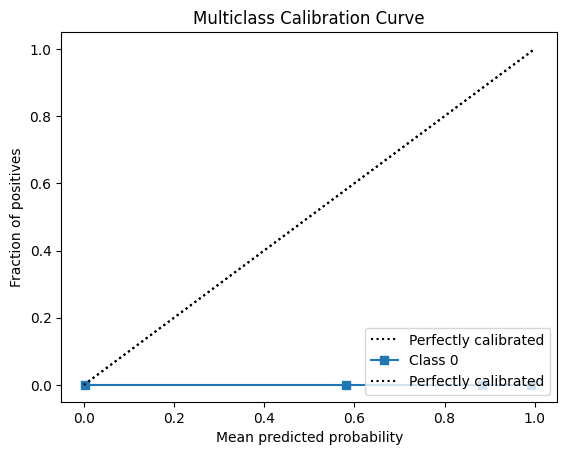

In [158]:
fig, ax = plt.subplots()

n_classes = y_prob.shape[1]
for class_idx in range(n_classes):
    class_prob = y_prob[:, class_idx]
    class_mask = (y_true == class_idx)
    CalibrationDisplay.from_predictions(
        class_mask,
        class_prob,
        n_bins=10,
        ax=ax,
        name=f"Class {class_idx}"
    )

ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

ax.set_title("Multiclass Calibration Curve")
ax.set_xlabel("Mean predicted probability")
ax.set_ylabel("Fraction of positives")
ax.legend(loc="lower right")

plt.show()

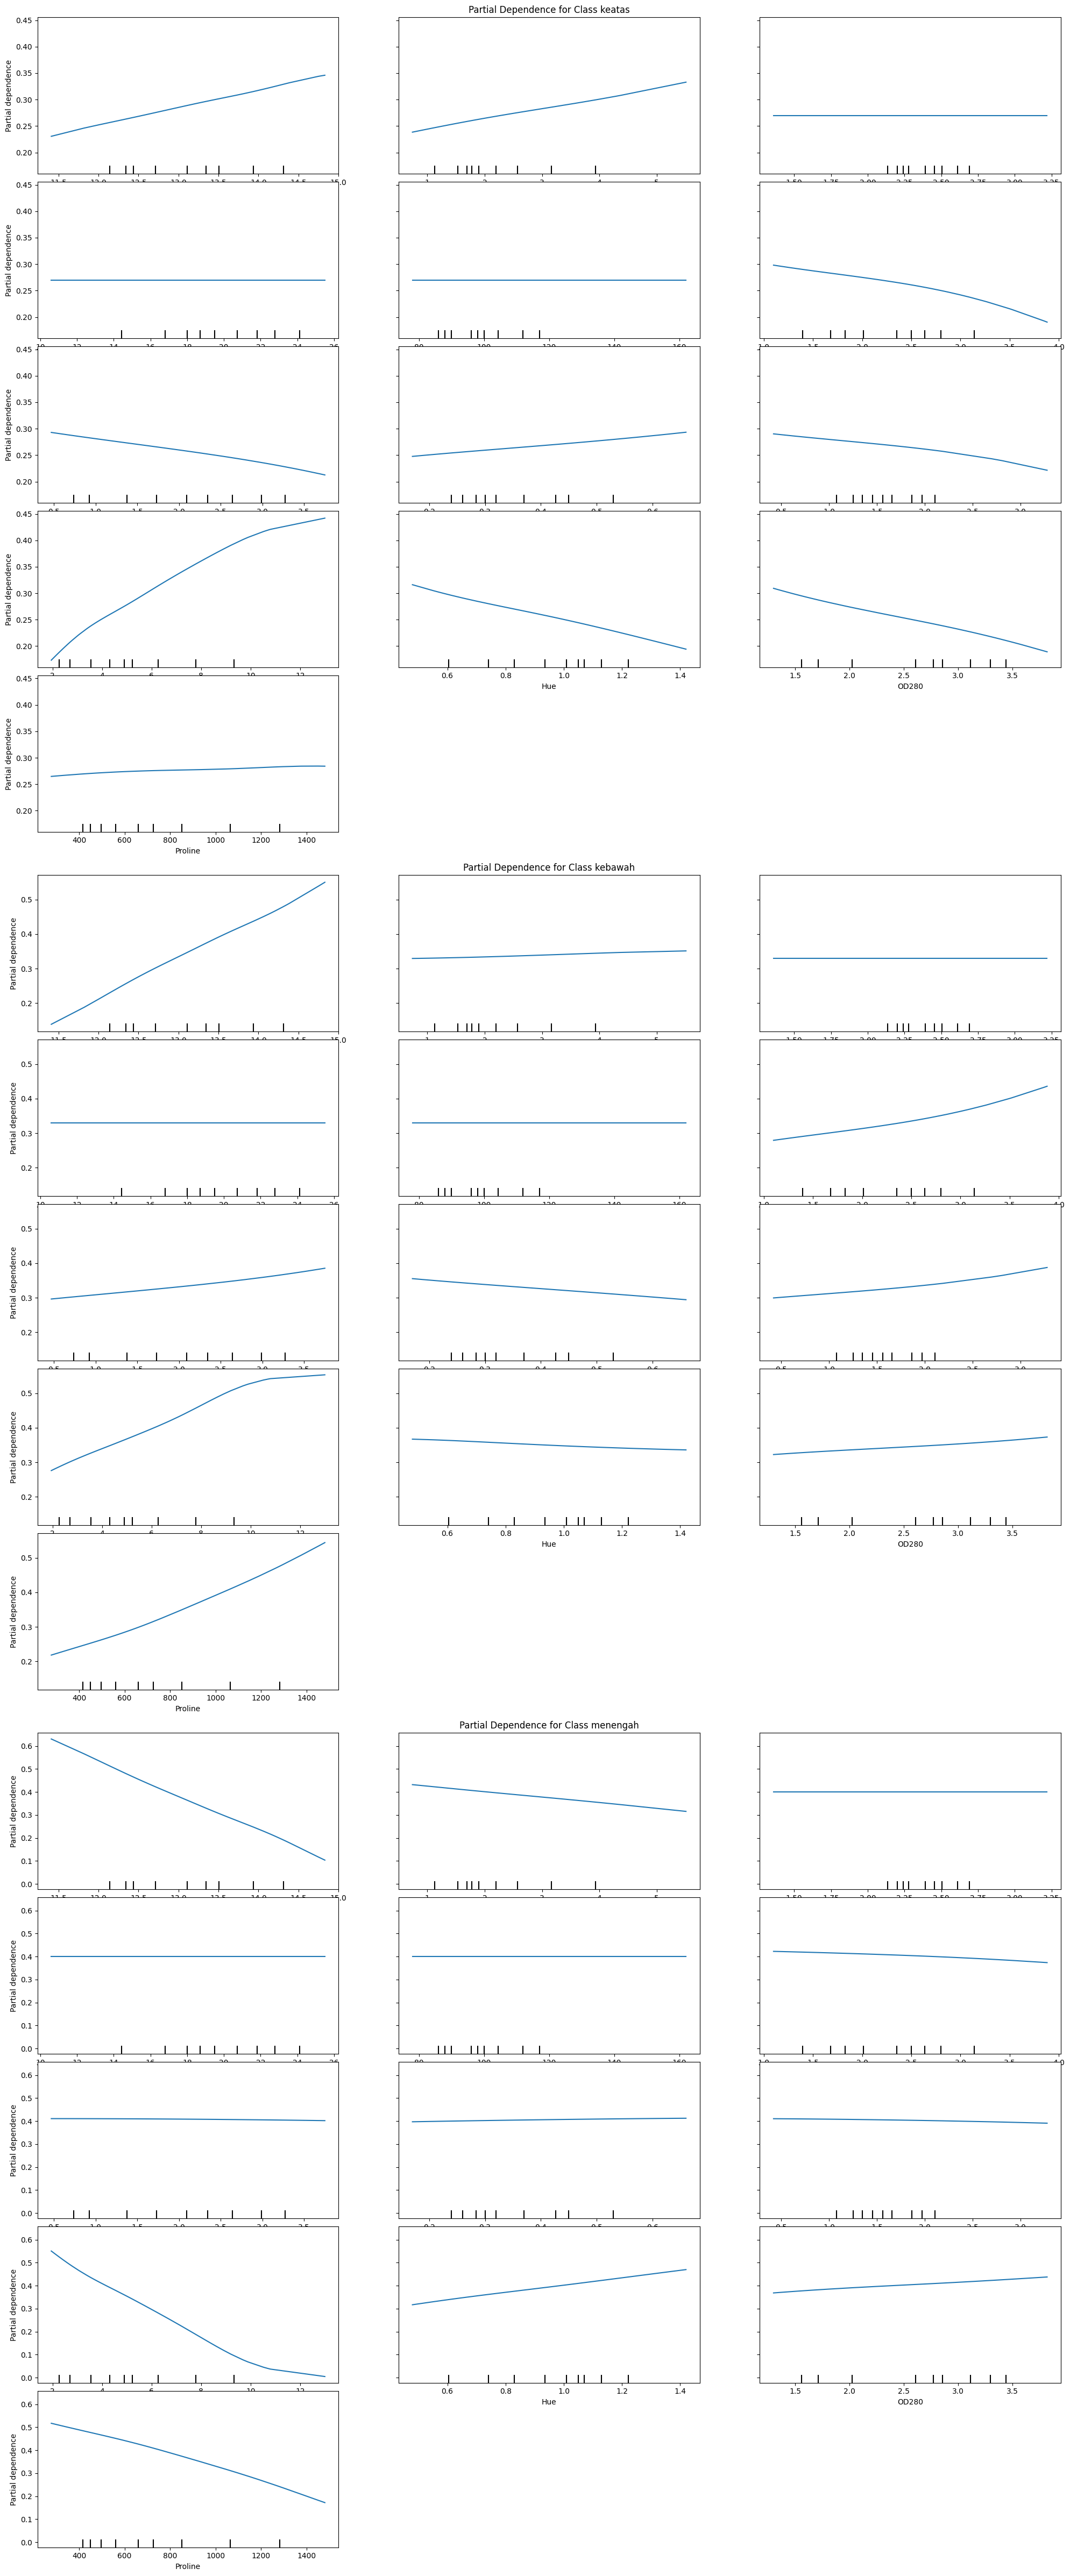

In [159]:
features = X.columns

n_classes = len(model.classes_)
fig, axes = plt.subplots(nrows=n_classes, figsize=(20, 16 * n_classes))

for i, target_class in enumerate(model.classes_):
    display = PartialDependenceDisplay.from_estimator(
        model,
        X_test,
        features,
        target=target_class,
        ax=axes[i]
    )
    axes[i].set_title(f"Partial Dependence for Class {target_class}")

plt.tight_layout()
plt.show()

In [170]:
loadings = pca_model.components_

selected_feature_indices = model.named_steps['fs'].get_support(indices=True)
selected_feature_names = preprocessor.get_feature_names_out()[selected_feature_indices]

loadings_df = pd.DataFrame(loadings.T, 
                         columns=[f"PC{i+1}" for i in range(pca_model.n_components_)],
                         index=selected_feature_names)

loadings_df

PC1       PC2
num__Alcohol               0.114015  0.570719
num__Malic_Acid           -0.274119  0.182319
num__Total_Phenols         0.412379  0.069274
num__Flavanoids            0.436299  0.015648
num__Nonflavanoid_Phenols -0.316523 -0.027819
num__Proanthocyanins       0.339362  0.023811
num__Color_Intensity      -0.085023  0.598238
num__Hue                   0.302749 -0.241937
num__OD280                 0.407767 -0.149855
num__Proline               0.266332  0.442466

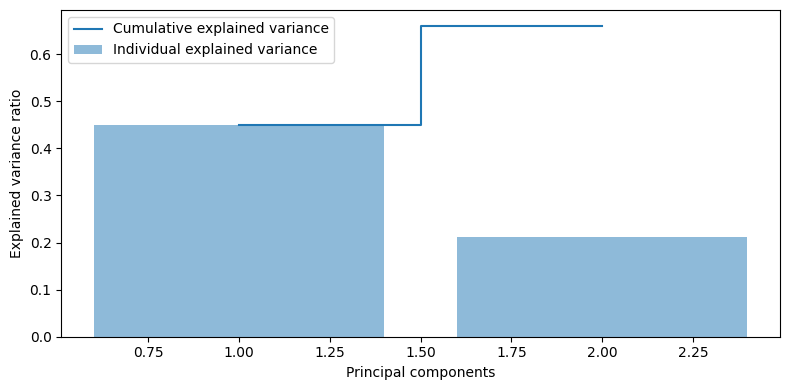

In [161]:
explained_variance = pca_model.explained_variance_ratio_

plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance)+1), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()